## Basic Return Analysis and Hypothesis Testing of selected German Stocks (SIE, ALVG, VOWG)

In this exercise, we consider three German stock prices (for  Siemens, Allianz SE and Volkswagen AG)

Firstly, we compute sample statistics namely mean, standard deviation, skewness, kurtosis, minimum and maximum of the stock returns.

Next we consider the following hypothesis test for the stock returns;

(i) The null hypothesis that  the average stock returns is zero.  
(ii) The null hypothesis that the skewness measure of the return is zero.  
(iii) The null hypothesis that the excess kurtosis of the return is zero.

<br>


We start by loading the relevant python libraries and loading the data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [14]:
df = pd.read_csv("3_stocks.csv", sep=";")
df.head()

,Date,SIE,ALVG,VOWG
0,17-Apr-2025,187.02,348.2,89.54
1,16-Apr-2025,186.14,347.3,88.84
2,15-Apr-2025,185.30,343.0,89.30
3,14-Apr-2025,185.70,337.7,87.36
4,11-Apr-2025,180.68,328.0,85.36


In [15]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2788 non-null   object 
 1   SIE     2788 non-null   float64
 2   ALVG    2788 non-null   float64
 3   VOWG    2788 non-null   float64
dtypes: float64(3), object(1)
memory usage: 87.3+ KB


<br>

The monthly names in the dataset are in German/Deutsch, so we convert them to English to ensure compatibility with pandas-dataframe’ datetime format, which expects English month names. This step is necessary to ensure that the columns are appropriately converted to time series format. The script below will do exactly that.

In [16]:

month_map = {
    "Jan": "Jan", "Feb": "Feb", "Mrz": "Mar", "Mär": "Mar", "Apr": "Apr",
    "Mai": "May", "Jun": "Jun", "Jul": "Jul", "Aug": "Aug",
    "Sep": "Sep", "Okt": "Oct", "Nov": "Nov", "Dez": "Dec"
}

df['Date'] = df['Date'].replace(month_map, regex=True)

In [17]:
df.set_index("Date", inplace = True)
df.index = pd.to_datetime(df.index)


<br>

The data is then re-sampled from daily frequency to weekly frequency for the purposes of our analysis.
<br>

In [18]:
weekly_df = df.resample('W').sum()
weekly_df.head()

,SIE,ALVG,VOWG
Date,,,
2014-04-27,262.2527,365.85,585.40
2014-05-04,339.6972,495.45,771.75
2014-05-11,430.4471,615.50,949.90
2014-05-18,441.3909,610.50,948.00
2014-05-25,429.2212,607.95,954.55



<br> Below is a time series plot of the weekly closing prices of the three stocks

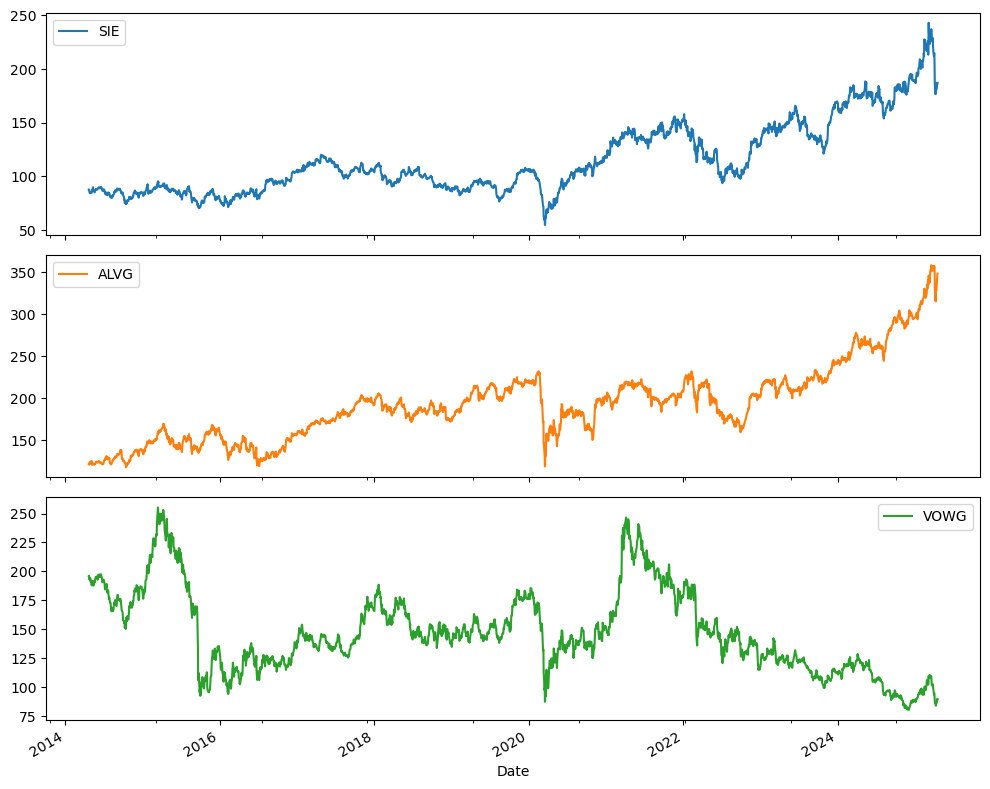

In [19]:

df[["SIE", "ALVG", "VOWG"]].plot(subplots=True, figsize=(10, 8), layout=(3, 1), sharex=True)
plt.tight_layout()
plt.show();

<br>The above plots reveal that the weekly stock prices for SIE and ALVG have an upward sloping trend, which is more pronounced especially after 2021 (possibly after the covid crisis). VOWG weekly stocks prices have a pronounced download trend after 2021.

<br>



<br> Next, the stock returns is calculated as the percentage changes in the prices of the stocks.
<br>We import locally created  **modules** called "stock_functions" which contains two functions namely "growth_rate" and "log_returns".
<br>  **growth_rate** computes the growth rate (perchantage change)  and **log_returns** computes the log changes. See the stock_functions.py file



In [20]:
from stock_functions import growth_rate 
from stock_functions import log_returns

In [21]:
df_return = growth_rate(weekly_df)
df_return.dropna(inplace = True)
df_return.head()

,SIE,ALVG,VOWG
Date,,,
2014-05-04,29.530487,35.424354,31.832935
2014-05-11,26.714939,24.230498,23.083900
2014-05-18,2.542426,-0.812348,-0.200021
2014-05-25,-2.757125,-0.417690,0.690928
2014-06-01,2.553881,2.171231,2.152847


<br>

### 1.1 Simple returns plot

<br> Below is a time series plot of the simple returns of the three stocks


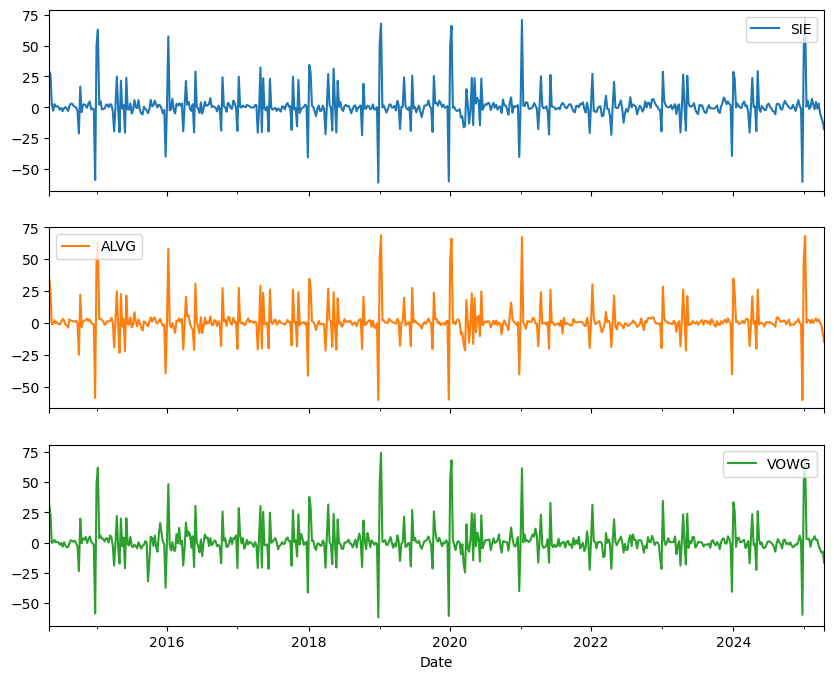

In [22]:
df_return[["SIE", "ALVG", "VOWG"]].plot(subplots=True, figsize=(10, 8), layout=(3, 1), sharex=True);

<br> The above plot reveals that even with a few fluctuations, the average stock returns is stationary around zero for all the three stocks

<br>

### 1.2 Sample summary Statistics

The summary statistics for the simple log returns is computed below. The sample averages for the three stocks are all positive with a high standard deviation. It turned out that ALVG is the stock with the highest average returns.


In [23]:
df_return.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
SIE,573.0,1.062,13.137,-61.046,-1.670,0.346,2.370,72.441
ALVG,573.0,1.103,13.059,-60.386,-1.212,0.378,1.977,68.717
VOWG,573.0,0.826,13.358,-61.978,-2.756,0.169,2.728,74.294


<br>

### 1.3 Hypothesis testing for the mean returns

Next we test the hypothesis that the mean of the returns of each stock is zero. This is given by:
<br>
$H_{0}: \beta = 0$

The formula for the t-test is as follows:

**T-Test**

$$
t_{\hat{\beta}}  = \frac{\hat{\beta} - \theta}{se(\hat{\beta})}
$$

Where $\hat{\beta}$ is the parameter to be tested, $\theta$ is the hypothesized value,  **Se** is the standard error of the parameter.
The test- statistic $t_{\hat{\beta}}$ has a t-distribution with 1 degree of freedom. <br>
The test measures how many standard deviations the parameter value ($\hat{\beta}$) is away from the hypothetized value.
We consider rejection of the null hypothesis at 5\% significance level. This implies that we are willing to mistakingly reject the null hypothesis when it is indeed true 5\% of the time.
<br>The test rejects the null hypothesis for significantly higher values of the test-statistic at 5\% level (95 percentile in the t-distribution will constitute our critical value).

<br>


In [24]:
SIE_beta  = 0.957752

t_stat, p_value = stats.ttest_1samp(df_return["SIE"], popmean=0)

print("t-statistic:", t_stat.round(3))
print("p-value:", p_value.round(3))


if p_value < 0.05:
    print("Reject null hypothesis: The mean return for SIE stocks is significantly different from zero.")
else:
    print("Fail to reject null hypothesis: The mean return for SIE stocks is not significantly different from zero.")
    

t-statistic: 1.934
p-value: 0.054
Fail to reject null hypothesis: The mean return for SIE stocks is not significantly different from zero.


In [25]:

ALVG_beta = 0.918062

t_stat, p_value = stats.ttest_1samp(df_return["ALVG"], popmean=0)

print("t-statistic:", t_stat.round(3))
print("p-value:", p_value.round(3))


if p_value < 0.05:
    print("Reject null hypothesis: The mean return for ALVG stocks is significantly different from zero.")
else:
    print("Fail to reject null hypothesis: The mean return for ALVG stocks is not significantly different from zero.")

t-statistic: 2.021
p-value: 0.044
Reject null hypothesis: The mean return for ALVG stocks is significantly different from zero.


In [26]:

VOWG_beta = 0.868345

t_stat, p_value = stats.ttest_1samp(df_return["VOWG"], popmean=0)

print("t-statistic:", t_stat.round(3))
print("p-value:", p_value.round(3))


if p_value < 0.05:
    print("Reject null hypothesis: The mean return for VOWG stocks is significantly different from zero.")
else:
    print("Fail to reject null hypothesis: The mean return for VOWG stocks is not significantly different from zero.")

t-statistic: 1.48
p-value: 0.139
Fail to reject null hypothesis: The mean return for VOWG stocks is not significantly different from zero.



<br>
 Based on the results of the hypothesis test namely, our rejection of the null hypothesis for the average value of ALVG stocks and failure to reject the null hypothesis for the other two stocks, we can infer that ALVG stocks is the most promising of the three stocks in terms of returns. This is becuase its average value is significantly not zero.


<br>

### 2.1 Sample Skewness

The skewness represents the third moment of a distribution. It measures the symmetry of the distribution with respect to its mean. The formula for the sample skewness is given by :

$$
\hat{S}(x) = \frac{1}{(T-1)\hat{\sigma}_{x}^{3}} \sum_{t=1}^{T}(x_{t}- \hat{\mu}_{x})^{3}
$$

Where $T$ is the sample size (time series dimension), $\hat{\mu_{x}}$ and $\hat{\sigma}_{x}$ are the men and the standrd deviation of the sample respectively

In [27]:
df_return.skew()

SIE     0.957752
ALVG    0.918062
VOWG    0.868345
dtype: float64

**Hypothesis test for sample skewness**

In [28]:


t_stat, p_value = stats.skewtest(df_return["ALVG"])
    
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject null: Returns for ALVG are significantly skewed.")
else:
    print("Fail to reject null: No significant skewness.")

t-statistic: 7.829
p-value: 0.000
Reject null: Returns for ALVG are significantly skewed.


<br>

The skewness for the distribution of the three stock returns above was computed. The values ranges between 0.8 and 0.9.
<br> We therefore test the null hypothesis of "skewness" for only one of the stocks (ALVG stocks). We chose to test this particluar stocks becauses our hypothesis of its mean reaveals that it is non-zero.
<br> Based on the results of the null hypothesis (rejection of the null of symmetry), it can be inferred that the distribution of ALVG stock returns is indeed positively skewed. This means the distribution of return is clustered to the left with longer right tail.

<br>**Implications**: 
<br>Majority of returns are small/modest, however only a few (rare) are very high. 
<br> Furthermore, a positively skewed asset may have low average returns and low volatility, but still be risky, because gains are rare but large.

<br>

<br>

### 3.1 Sample Kurtosis

The fourth moment condition is known as Kurtosis, and it measures the tail behaviour of the distribution (the tail thickness)

$$
\hat{K}(x) = \frac{1}{(T-1)\hat{\sigma}_{x}^{4}} \sum_{t=1}^{T}(x_{t}- \hat{\mu}_{x})^{4}
$$


In [29]:
df_return.kurt()

SIE     10.252440
ALVG    10.150641
VOWG     9.239044
dtype: float64

<br>

**Hypothesis test for Kurtosis**

In [30]:

t_stat, p_value = stats.kurtosistest(df_return["ALVG"])
    
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Reject null: Returns for ALVG  have significantly different kurtosis from normal.")
else:
    print("Fail to reject null: No significant difference in kurtosis.")
    

t-statistic: 10.608
p-value: 0.000
Reject null: Returns for ALVG  have significantly different kurtosis from normal.


<br>

The kurtosis  measure for the distribution of the three stock returns is given above. This measures the fatness of the tails of the distribution.
<br> Values ranges between 9 and 10.
<br> We therefore test the null hypothesis of "excess kurtosis" for one of the stocks (ALVG) stocks. 
<br> Based on the results of the null hypothesis, it can be inferred that the distribution of ALVG stock returns has kurtosis different from that of normal distribution (fatter tails).

<br> **Implication**
<br>More extreme returns are likely than the normal distribution. Hence models that are based on normal distribution will not do a good job estimating the risk of losses or gains. Also the computed standard deviations will likely not capture the behaviour or risk at the tails of the distribtion appropriately

<br>

## 4.1 Log returns
One can also repeat the excercise above for the **log returns** of the data (as done for the simple returns).
 The procedure will be the same as simple stock return

In [32]:
df_logr = log_returns(weekly_df)
df_logr.dropna(inplace = True)
df_logr.head()

,SIE,ALVG,VOWG
Date,,,
2014-05-04,25.874609,30.324303,27.636529
2014-05-11,23.676980,21.696851,20.769605
2014-05-18,2.510644,-0.815665,-0.200221
2014-05-25,-2.795847,-0.418565,0.688552
2014-06-01,2.521815,2.147996,2.130000


In [33]:
df_logr.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
SIE,573.0,0.182,13.625,-94.279,-1.684,0.345,2.342,54.488
ALVG,573.0,0.231,13.564,-92.598,-1.219,0.377,1.958,52.305
VOWG,573.0,-0.087,13.900,-96.700,-2.794,0.169,2.691,55.557


In [34]:
df_logr.kurt()

SIE     16.756968
ALVG    16.768528
VOWG    15.457969
dtype: float64

Since the kurtosis values are all greaater than zero, we infer that there is a heavier tail (more outliers). There is a special term for this known as **leptokurtic**
<br>
The oposite with lighter tail or fewer outliers is **platykurtic**

In [35]:
df_logr.skew()

SIE    -1.758844
ALVG   -1.783672
VOWG   -1.694343
dtype: float64

The output from the skewness test shows that the log returns are all negatively skewed